References:
1. For landmarks - https://medium.com/analytics-vidhya/facial-landmarks-and-face-detection-in-python-with-opencv-73979391f30e
2. VGG16 - https://androidkt.com/how-to-use-vgg-model-in-tensorflow-keras/

In [1]:
from PIL import Image
import glob   
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
origimages = []
for f in glob.iglob("Datasets/Aberdeen/adrian1.jpg"):
    origimages.append(np.asarray(Image.open(f)))
origimages = np.array(origimages)

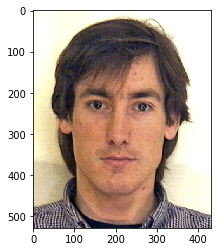

In [3]:
plt.imshow(origimages[0],cmap='gray')
plt.show()

In [3]:
# Positive and negative samples

Xtrain = []
Ytrain = []
for img in origimages[0:50]:
    CASCADE="Face_cascade.xml"
    FACE_CASCADE=cv2.CascadeClassifier(CASCADE)
    faces = FACE_CASCADE.detectMultiScale(img, scaleFactor=1.16, minNeighbors=5, minSize=(25,25), flags=0)
    
    LBFmodel = "lbfmodel.yaml"
    landmark_detector  = cv2.face.createFacemarkLBF()
    landmark_detector.loadModel(LBFmodel)
    try:
        _, landmarks = landmark_detector.fit(img, faces)
    except:
        continue
    
    i = 0
    for x,y,w,h in faces:
        try:
            roi = img[y-10:y+h+10,x-10:x+w+10,:]
            trainingdata = np.resize(roi, (224, 224, 3))
            #trainingdata = trainingdata.flatten()
            #flat_landmarks = landmarks[i][0].flatten()
            #trainingdata = np.concatenate((trainingdata, flat_landmarks))
        except:
            continue
        Xtrain.append(trainingdata.tolist())
        Ytrain.append(0)
        
        try:
            w = len(roi)
            h = len(roi[0])
            neg_sample = np.resize(roi, (int(w/2), int(h/2), 3))
            neg_sample = cv2.GaussianBlur(neg_sample, (5,5), 0)
            neg_faces = FACE_CASCADE.detectMultiScale(neg_sample)
            _, neg_landmarks = landmark_detector.fit(neg_sample, neg_faces)

            orig_pt1 = landmarks[i][0][0]
            orig_pt2 = landmarks[i][0][1]
            orig_pt3 = landmarks[i][0][2]

            neg_pt1 = neg_landmarks[0][0][0]
            neg_pt2 = neg_landmarks[0][0][1]
            neg_pt3 = neg_landmarks[0][0][2]

            M = cv2.getAffineTransform(np.float32([orig_pt1, orig_pt2, orig_pt3]) , np.float32([neg_pt1, neg_pt2, neg_pt3]))

            neg_sample = cv2.warpAffine(neg_sample, M, (len(neg_sample[0]),len(neg_sample)))
            trainingdata = np.resize(neg_sample, (224, 224, 3))
            #trainingdata = trainingdata.flatten()
            #flat_landmarks = landmarks[0][0].flatten()
            #trainingdata = np.concatenate((trainingdata, flat_landmarks))
            Xtrain.append(trainingdata.tolist())
            Ytrain.append(1)
        except:
            print("affine warp not possible")
            continue
        
        i += 1

affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible
affine warp not possible


In [ ]:
import tensorflow as tf

def _input_fn(x,y):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    return ds

train_ds = _input_fn(Xtrain, Ytrain)

IMG_SHAPE = (224, 224, 3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

VGG16_MODEL.trainable=False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
model = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

history = model.fit(x=np.array(Xtrain),
                    y=np.array(Ytrain),
                    epochs=100, 
                    steps_per_epoch=2,
                    validation_split=0.1)

c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\h

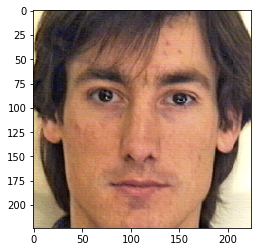

(224, 224, 3)


In [4]:
CASCADE="Face_cascade.xml"
FACE_CASCADE=cv2.CascadeClassifier(CASCADE)

faces = FACE_CASCADE.detectMultiScale(origimages[0],scaleFactor=1.16,minNeighbors=5,minSize=(25,25),flags=0)
for x,y,w,h in faces:
    sub_img = origimages[0][y-10:y+h+10,x-10:x+w+10]
    sub_img = cv2.resize(sub_img, (224, 224))
    plt.imshow(sub_img,cmap='gray')
    plt.show()
    print(sub_img.shape)

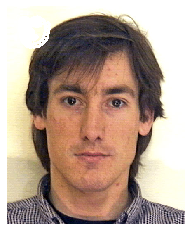

In [7]:
LBFmodel = "lbfmodel.yaml"
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)
_, landmarks1 = landmark_detector.fit(origimages[0], faces)

for landmark in landmarks1:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        cv2.circle(origimages[0], (x, y), 5, (255, 255, 255), 5)
plt.axis("off")
plt.imshow(origimages[0])

In [120]:
tf.data.Dataset.from_tensor_slices(([[1],[2],[3]], [3, 4, 5]))

<DatasetV1Adapter shapes: ((1,), ()), types: (tf.int32, tf.int32)>

In [5]:
w = len(sub_img)
h = len(sub_img[0])
neg_sub_img = cv2.resize(sub_img, (int(w/2), int(h/2)))
neg_sub_img = cv2.GaussianBlur(neg_sub_img,(5,5),0)

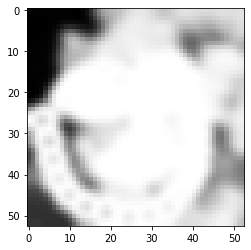

In [15]:
plt.imshow(neg_sub_img,cmap='gray')
plt.show()

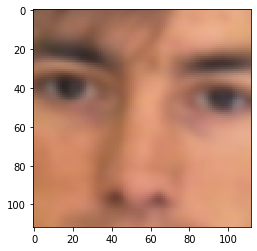

In [9]:
CASCADE="Face_cascade.xml"
FACE_CASCADE=cv2.CascadeClassifier(CASCADE)

faces = FACE_CASCADE.detectMultiScale(neg_sub_img,scaleFactor=1.16,minNeighbors=5,minSize=(25,25),flags=0)

LBFmodel = "lbfmodel.yaml"
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)
_, landmarks2 = landmark_detector.fit(neg_sub_img, faces)

pt1 = landmarks1[0][0][0]
pt2 = landmarks1[0][0][1]
pt3 = landmarks1[0][0][2]

pt11 = landmarks2[0][0][0]
pt12 = landmarks2[0][0][1]
pt13 = landmarks2[0][0][2]

M = cv2.getAffineTransform(np.float32([pt1,pt2,pt3]) , np.float32([pt11,pt12,pt13]))

output = cv2.warpAffine(neg_sub_img,M,(len(neg_sub_img[0]),len(neg_sub_img)))
mod_curr_photo = cv2.warpAffine(img, neg_sub_img, (bwidth, bheight))

plt.imshow(output, cmap='gray')
plt.show()

In [ ]:
ypred = []
ytrue = []
metadata = None

def updatePrediction(videopath):
    vid = cv2.VideoCapture(videopath)
    v_int = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    all_frames = []
    for i in range(v_int):
        ret, frame = vid.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        all_frames.append(frame)
    print(len(all_frames))

    test = np.array(all_frames)
    prediction = None
    for frame in test:
        CASCADE="Face_cascade.xml"
        FACE_CASCADE=cv2.CascadeClassifier(CASCADE)
        faces = FACE_CASCADE.detectMultiScale(frame, scaleFactor=1.16, minNeighbors=5, minSize=(25,25), flags=0)
        for x,y,w,h in faces:
            roi = frame[y-10:y+h+10,x-10:x+w+10,:]
            tempprediction = [0,1]#model.predict(np.resize(roi, (1, 224, 224, 3)))
            prediction += tempprediction
            
    prediction /= len(all_frames)
    print(prediction[0])
    ypred.append(prediction[0])
    print(metadata[videopath.split("/")[1]]['label'])
    if metadata[videopath.split("/")[1]]['label'] == "FAKE":
        ytrue.append([0, 1])
    else:
        ytrue.append([1, 0])

import json

with open('Datasets/Test data/videos/metadata.json') as json_file:
    metadata = json.load(json_file)

for f in glob.iglob("Datasets/Test data/videos/*.mp4"):
    print(f)
    updatePrediction(f)

Datasets/Test data/videos\aagfhgtpmv.mp4
300


In [33]:
tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))

<DatasetV1Adapter shapes: ((50312,), ()), types: (tf.float32, tf.int32)>

In [89]:
roi.shape

(288, 288, 3)

In [91]:
a = np.resize(roi, (224, 224, 3))

In [92]:
a.shape

(224, 224, 3)

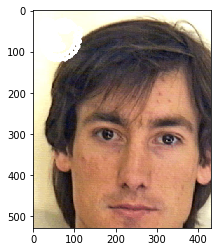

In [27]:
pt1 = landmarks1[0][0][20]
pt2 = landmarks1[0][0][25]
pt3 = landmarks1[0][0][9]

pt11 = landmarks2[0][0][20]
pt12 = landmarks2[0][0][25]
pt13 = landmarks2[0][0][9]


M = cv2.getAffineTransform(np.float32([pt1,pt2,pt3]) , np.float32([pt11,pt12,pt13]))

output = cv2.warpAffine(origimages[0], M, (len(origimages[0][0]),len(origimages[0])))
#mod_curr_photo = cv2.warpAffine(img, neg_sub_img, (bwidth, bheight))

plt.imshow(output, cmap='gray')
plt.show()

In [22]:
landmarks1[0][0][37]

array([41.960682, 41.039913], dtype=float32)

In [58]:
a

array([[1, 2]])